In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# choose seed 42
np.random.seed(42)

In [ ]:
# Load in the breast cancer dataset from sklearn.datasets package
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
# Check the type of data
type(data)

sklearn.utils.Bunch

In [ ]:
# Get the keys of data as it is 'Bunch' which somewhat acts like a dictionary
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# Print the target names (2 Classes) which means It's a Binary classification problem
print(data.target_names)

['malignant' 'benign']


In [ ]:
# Read the first five rows of data as DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Shape of dataframe
df.shape

(569, 30)

In [ ]:
# Get some info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Check the target and it's shape
print(data.target)
print(' ')
print('Shape of the target:', data.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
# Let's split the data into train and test sets to be able to evaluate the model
from sklearn.model_selection import train_test_split
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# Scale our data
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Get the length of X_train (m) and the no. of dimentions of each observation (D)
m, D = X_train.shape

In [ ]:
# Build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=D))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# Show layers of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
# Train the model
history = model.fit( X_train,
                    y_train,
                    validation_split = 0.2, 
                    epochs = 100 )

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 1.2097 - accuracy: 0.2274 - val_loss: 1.1365 - val_accuracy: 0.2718
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 1.0903 - accuracy: 0.2763 - val_loss: 1.0285 - val_accuracy: 0.3495
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.9851 - accuracy: 0.3521 - val_loss: 0.9319 - val_accuracy: 0.4369
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.8877 - accuracy: 0.4401 - val_loss: 0.8498 - val_accuracy: 0.4757
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.8035 - accuracy: 0.4866 - val_loss: 0.7791 - val_accuracy: 0.5049
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.5428 - val_loss: 0.7179 - val_accuracy: 0.5534
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6088 - val_loss: 0.6661 - val_accuracy: 0.6214
Epoch 8/100


In [ ]:
# Evaluate our model 
print('Evaluate the output (Train score):', model.evaluate(X_train, y_train))
print('Evaluate the output (Test score) :', model.evaluate(X_test,  y_test))

16/16 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9727
Evaluate the output (Train score): [0.10806707292795181, 0.97265625]
2/2 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9825
Evaluate the output (Test score) : [0.09481541812419891, 0.9824561476707458]


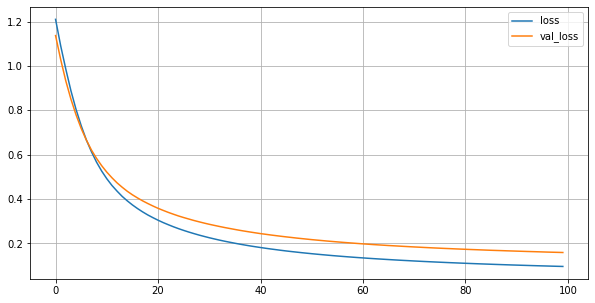

In [ ]:
# Plot the losses
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(history.history['loss'],     label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

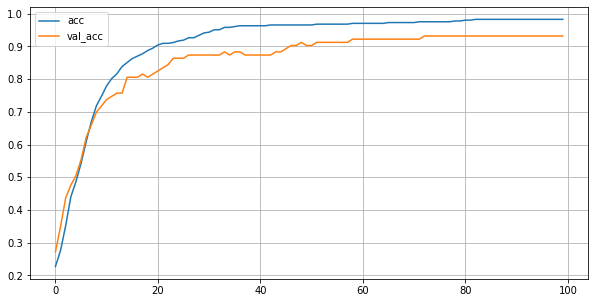

In [ ]:
# Plot the accuracy
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(history.history['accuracy'],     label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make predictions
y_predict = model.predict(X_test)
y_predict = np.round(y_predict).flatten()
y_predict

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
# Calculate the accuracy manually
print("Manually calculated accuracy:", np.mean(y_predict == y_test))

Manually calculated accuracy: 0.9824561403508771


-----

In [ ]:
# Save the model to h5 file
model.save('linearclassifier.h5')

In [ ]:
# Check if the model was saved
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Nov 30 13:01 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Nov 18 14:36 sample_data


In [ ]:
# Let's load in the model and check if it works correctly
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 6ms/step - loss: 0.0948 - accuracy: 0.9825
[0.09481541812419891, 0.9824561476707458]


In [27]:
# Finally let's download the model
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>